## Import Packages

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
import string
string.punctuation
import contractions
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopword')
nltk.download('pultk')
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Error loading pultk: Package 'pultk' not found in index


## Import the data

In [319]:
data = pd.read_excel(r'C:\Users\user\Desktop\Womens Clothing Reviews Data.xlsx')

## Data Preparation

In [320]:
data.shape

(23486, 11)

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


### 1. Check for null and duplicate values

In [322]:
print(data.isna().sum() *100/len(data))
print('Result :A very less percent of values are missing, so we can drop the missing data.')

Product ID         0.000000
Category           0.059610
Subcategory1       0.059610
SubCategory2       0.059610
Location           0.000000
Channel            0.000000
Customer Age       0.000000
Review Title      16.222430
Review Text        3.597888
Rating             0.000000
Recommend Flag     0.000000
dtype: float64
Result :A very less percent of values are missing, so we can drop the missing data.


In [323]:
# Dropping missing values from the dataset
data.dropna(inplace=True)

In [324]:
data.shape

(19662, 11)

In [325]:
data.duplicated().sum()

0

### 2. Correcting column names

In [326]:
# correcting column names
data.columns = [i.replace(' ','_')for i in data.columns]

In [327]:
data

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


### 3. Statistical Analysis

In [328]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Product_ID,19662.0,921.297274,200.227528,1.0,861.0,936.0,1078.0,1205.0
Customer_Age,19662.0,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,19662.0,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommend_Flag,19662.0,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0


In [329]:
data.describe(include='object').T

,count,unique,top,freq
Category,19662,3,General,11664
Subcategory1,19662,6,Tops,8713
SubCategory2,19662,20,Dresses,5371
Location,19662,4,Gurgaon,7361
Channel,19662,2,Web,11391
Review_Title,19662,13983,Love it!,136
Review_Text,19662,19656,Perfect fit and i've gotten so many compliment...,3


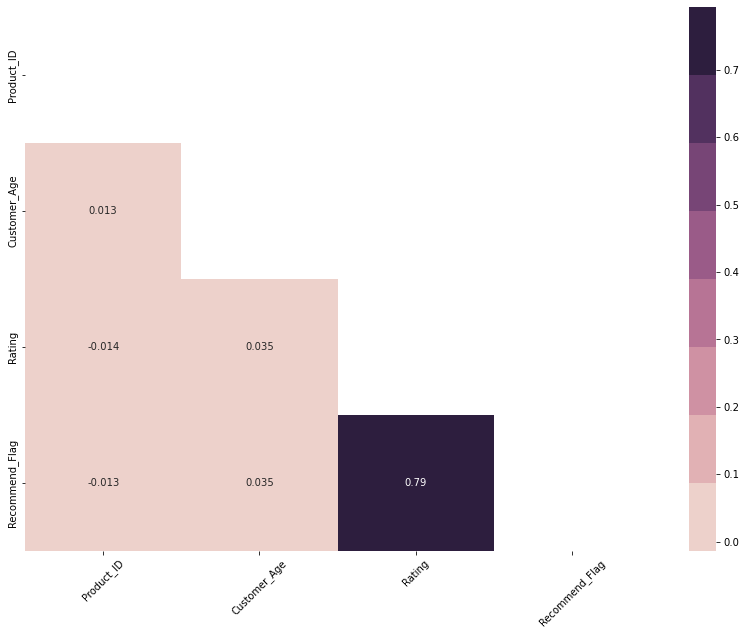

In [330]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(data.corr())

# using the upper triangle matrix as mask 
sns.heatmap(data.corr(), annot=True, cmap = sns.cubehelix_palette(8), mask=matrix)

plt.xticks(rotation=45);

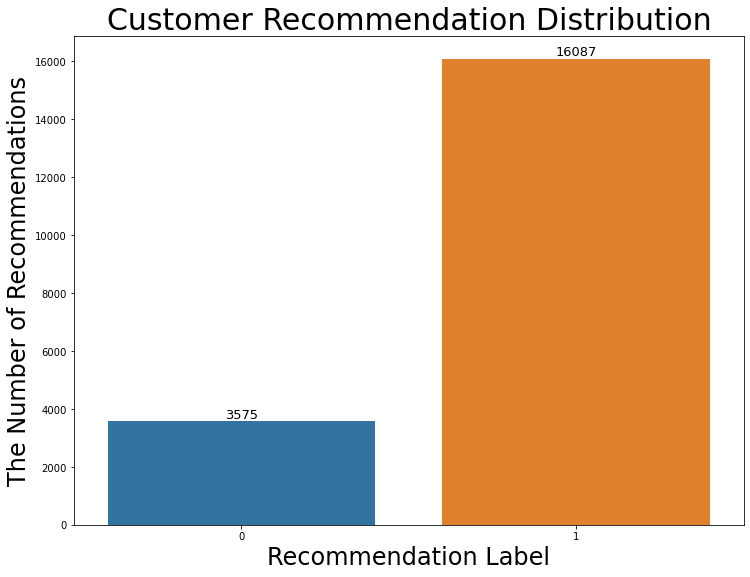

In [333]:
plt.figure(figsize=(12,9))
sns.countplot(x = data.Recommend_Flag, data = data)
plt.title('Customer Recommendation Distribution', fontsize=30)
plt.xlabel("Recommendation Label", fontsize=24)
plt.ylabel("The Number of Recommendations", fontsize=24)

for index,value in enumerate(data.Recommend_Flag.value_counts().sort_values()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

### 3. Expand all contracted words in the Review text

In [193]:
expanded_word = []
for i in data['Review_Text']:
    words = i.split()
    expanded = [contractions.fix(word) for word in words]
    expanded_word.append(' '.join(expanded))

In [194]:
data['Review_expand'] = expanded_word

In [195]:
data.head(2)

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,Review_expand
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,I had such high hopes for this dress and reall...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"I love, love, love this jumpsuit. it is fun, f..."


In [196]:
data.drop(columns=['Product_ID','Review_Text'],inplace=True)

In [197]:
data.head(3)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Rating,Recommend_Flag,Review_expand
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,3,0,I had such high hopes for this dress and reall...
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,5,1,"I love, love, love this jumpsuit. it is fun, f..."
4,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,5,1,This shirt is very flattering to all due to th...


### 4. Removing non-alphanumeric characters

In [198]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
data['Review_expand'] = data['Review_expand'].apply(lambda x: remove_punctuation(x))
data['Review_Title'] = data['Review_Title'].apply(lambda x: remove_punctuation(x))

In [199]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Rating,Recommend_Flag,Review_expand
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,3,0,I had such high hopes for this dress and reall...
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy,5,1,I love love love this jumpsuit it is fun flirt...
4,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,5,1,This shirt is very flattering to all due to th...
5,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,2,0,I love tracy reese dresses but this one is not...
6,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,5,1,I aded this in my basket at hte last mintue to...


In [200]:
data['sentiment_score'] = data.Review_expand.apply(lambda x:TextBlob(x).sentiment.polarity)


In [201]:
data['sentiment'] = np.where(data.sentiment_score >0.3,'Positive',np.where(data.sentiment_score<0.1,'Negative','Neutral'))
pd.crosstab(data.Rating,data.sentiment)

sentiment,Negative,Neutral,Positive
Rating,,,
1,368,266,57
2,621,595,144
3,777,1328,359
4,808,2397,1084
5,977,5222,4659


## Exploratory Data Analysis

In [203]:
# Group customers of different age into:
#young adult : 18-40
#middle-aged adult :41-60


def age_group(age):
    if age <=40:
        return 'young adult'
    elif ((age>40) & (age<=60)):
        return 'middle-aged adult'
    else:
        return 'old adult'
    
data['age'] = data['Customer_Age'].apply(age_group)

In [204]:
category_rating = data.groupby(['Category','Rating']).size()
category_percent =category_rating.groupby(level=[0]).apply(lambda x : x*100/x.sum()).reset_index()
category_percent.columns = ['Category','Rating','percent']


subcategory_rating = data.groupby(['Subcategory1','Rating']).size()
subcategory_percent =subcategory_rating.groupby(level=[0]).apply(lambda x : x*100/x.sum()).reset_index()
subcategory_percent.columns = ['SubCategory','Rating','percent']


age_rating = data.groupby(['age','Rating']).size()
age_percent =age_rating.groupby(level=[0]).apply(lambda x : x*100/x.sum()).reset_index()
age_percent.columns = ['Age','Rating','percent']


In [205]:
def label(x):
    return f'{x / 100 * len(data):.0f}\n{x:.0f}%'

<AxesSubplot:ylabel='None'>

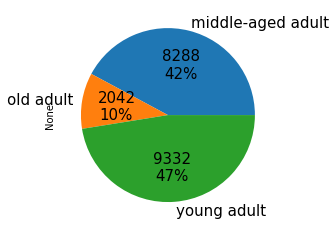

In [206]:
#Creating Pie Chart for Age_Category
data.groupby('age').size().plot(kind='pie', autopct=label, textprops={'fontsize':15})

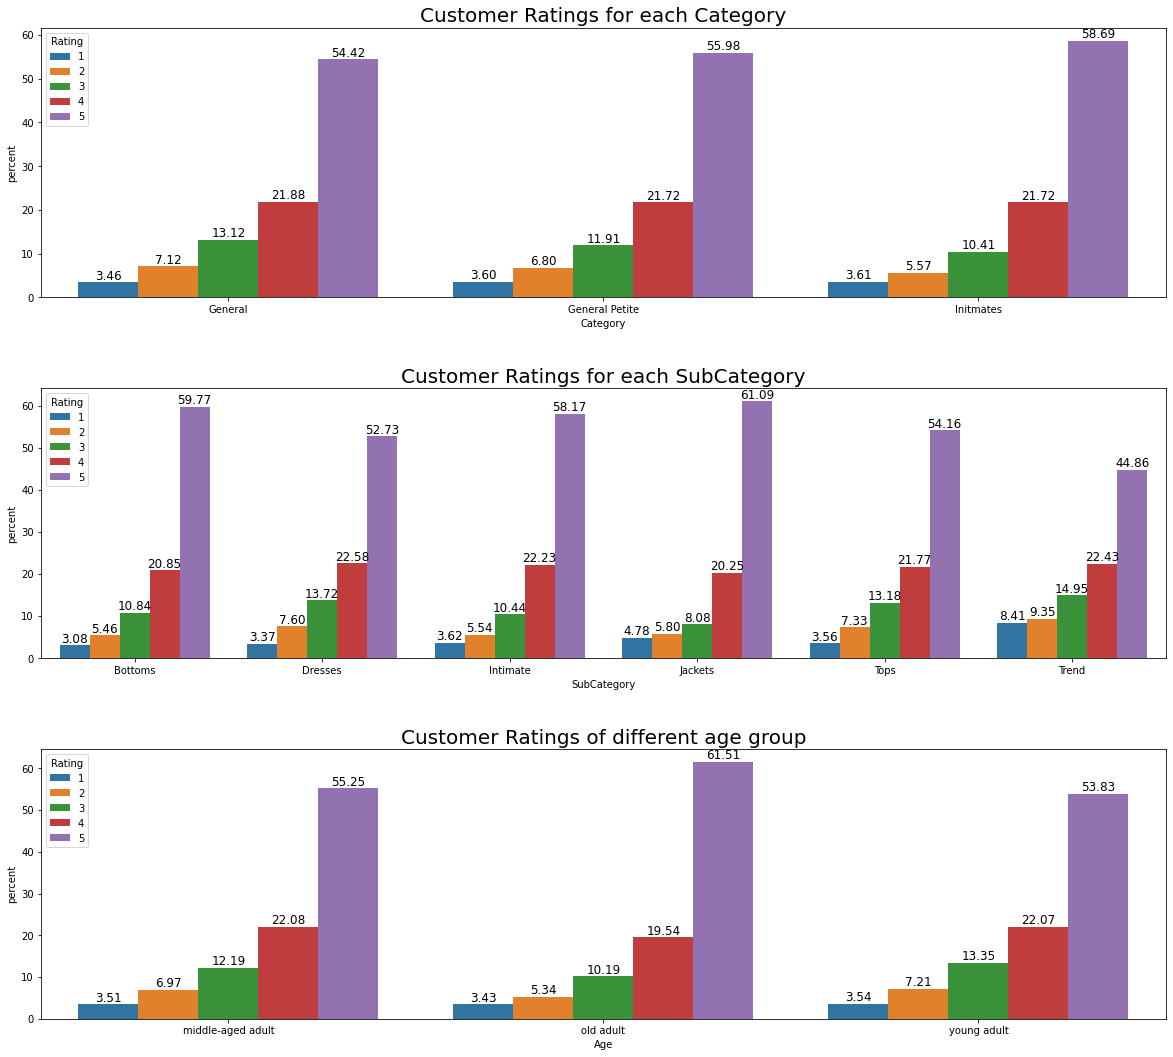

In [207]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=False,sharey=False,figsize=(18,16))
fig.tight_layout(pad=7.0)
sns.barplot(x='Category',y='percent',data=category_percent,hue='Rating',ax=ax1)
ax1.set_title('Customer Ratings for each Category',fontsize=20)

sns.barplot(x='SubCategory',y='percent',hue='Rating',data=subcategory_percent,ax=ax2)
ax2.set_title('Customer Ratings for each SubCategory',fontsize=20)

sns.barplot(x='Age',y='percent',hue='Rating',data=age_percent,ax=ax3)
ax3.set_title('Customer Ratings of different age group',fontsize=20)
for ax in [ax1,ax2,ax3]:
    for p in ax.containers:
        ax.bar_label(p,label_type='edge',labels=[f"{h.get_height():.2f}" for h in p],fontsize=12)

### Top 5 Positive Reviews with highest sentiment score

In [208]:
sentiment_scores_pos = []
for review in data['Review_expand']:
    blob = TextBlob(review)
    sentiment_scores_pos.append((review, blob.sentiment.polarity))

# Sort the list of sentiment scores in descending order
sorted_scores_pos = sorted(sentiment_scores_pos, key=lambda x: x[1], reverse=True)

# Print the top 5 reviews with the highest sentiment scores
for i in range(5):
    print(sorted_scores_pos[i][0])

This is a perfect jacket over any shirt tee or dress jacket is well made and goes with anything
If there ever was the perfect feminine dress this would be it 
Perfect way to add warmth in transition weather
This is awesome multiseason dress
My daughter had one and wore it with everythingi ended up getting one myselfit is a perfect weight


### Top 5 Negative Reviews with lowest sentiment score

In [209]:
sentiment_scores_neg = []
for review in data['Review_expand']:
    blob = TextBlob(review)
    sentiment_scores_neg.append((review, blob.sentiment.polarity))

# Sort the list of sentiment scores in descending order
sorted_scores_neg = sorted(sentiment_scores_neg, key=lambda x: x[1], reverse=False)

# Print the top 5 reviews with the highest sentiment scores
for i in range(5):
    print(sorted_scores_neg[i][0])

Cut out design no seems or hemsx000D very disappointed in retailer
Awful color horribly wrinkled and just a messso disappointed
What a disappointment and for the price it is outrageous
I would have bought this had it not been for the way the pockets are sewn in they are attached on the inside by a string if the string broke the pockets would dangle for the price you would think they would have sewn pockets in to the vest too bad
This arrived this week and i was so disappointed the proportions are all wrong from the empire waist to the dolman sleeves to the weird texture added to the material if i could sum up this jacket with one word it would be weird


### Most frequent words used in positive reviews

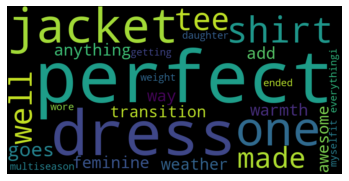

In [210]:
text = ' '.join([x[0] for x in sorted_scores_pos[:5]])
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Most frequent words used in negative reviews

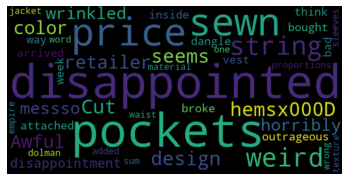

In [211]:
text = ' '.join([x[0] for x in sorted_scores_neg[:5]])
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Removing Stopping words

### Tokenization

In [224]:
data['cust_rev'] = data['Review_expand']


In [225]:
def tokkenize(word):
    tokken = nltk.word_tokenize(word)
    return  [w for w in tokken if w.isalpha]

In [226]:
data['Tokenized'] = data.apply(lambda x: tokkenize(x['cust_rev']), axis=1)
data[['cust_rev', 'Tokenized']].head()

,cust_rev,Tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,I love love love this jumpsuit it is fun flirt...,"[I, love, love, love, this, jumpsuit, it, is, ..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, but, this, on..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


In [32]:
stop = set(nltk.corpus.stopwords.words('english'))

In [33]:
stop = list(stop) + ['would','could','im','also','a','I','is','in','my','at']

In [227]:
def stop_word(word):
    stop = set(nltk.corpus.stopwords.words('english'))
    return [w for w in word if not w in stop]

In [228]:
data['stopping_word'] = data.apply(lambda x: stop_word(x['Tokenized']), axis=1)
data[['cust_rev', 'stopping_word']].head()

,cust_rev,stopping_word
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,I love love love this jumpsuit it is fun flirt...,"[I, love, love, love, jumpsuit, fun, flirty, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,I love tracy reese dresses but this one is not...,"[I, love, tracy, reese, dresses, one, petite, ..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."


### Stemming

In [229]:
def stemming(sw):
    stemmer = SnowballStemmer(language='english')
    return [stemmer.stem(w) for w in sw]

In [230]:
data['stemmed'] = data.apply(lambda x : stemming(x['stopping_word']),axis=1)
data[['cust_rev','stemmed']].head()

,cust_rev,stemmed
2,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, ini..."
3,I love love love this jumpsuit it is fun flirt...,"[i, love, love, love, jumpsuit, fun, flirti, f..."
4,This shirt is very flattering to all due to th...,"[this, shirt, flatter, due, adjust, front, tie..."
5,I love tracy reese dresses but this one is not...,"[i, love, traci, rees, dress, one, petit, 5, f..."
6,I aded this in my basket at hte last mintue to...,"[i, ade, basket, hte, last, mintu, see, would,..."


In [231]:
def rejoin_words(token_word):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(token_word))

In [232]:
data['Review_final'] = data.apply(lambda x: rejoin_words(x['stemmed']), axis=1)
data[['cust_rev', 'Review_final']].head()

,cust_rev,Review_final
2,I had such high hopes for this dress and reall...,i high hope dress realli want work initi order...
3,I love love love this jumpsuit it is fun flirt...,i love love love jumpsuit fun flirti fabul eve...
4,This shirt is very flattering to all due to th...,this shirt flatter due adjust front tie perfec...
5,I love tracy reese dresses but this one is not...,i love traci rees dress one petit 5 feet tall ...
6,I aded this in my basket at hte last mintue to...,i ade basket hte last mintu see would look lik...


In [40]:
data.head(2)

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Rating,Recommend_Flag,Review_expand,sentiment_score,sentiment,age,cust_rev,Tokenized,stopping_word,stemmed,Review_final
2,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,3,0,I had such high hopes for this dress and reall...,0.076392,Negative,middle-aged adult,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ...","[high, hopes, dress, really, wanted, work, ini...","[high, hope, dress, realli, want, work, initi,...",high hope dress realli want work initi order p...
3,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy,5,1,I love love love this jumpsuit it is fun flirt...,0.500000,Positive,middle-aged adult,I love love love this jumpsuit it is fun flirt...,"[I, love, love, love, this, jumpsuit, it, is, ...","[love, love, love, jumpsuit, fun, flirty, fabu...","[love, love, love, jumpsuit, fun, flirti, fabu...",love love love jumpsuit fun flirti fabul everi...


In [233]:
positive_review = data.Review_final[data.Rating>=4]
negative_review = data.Review_final[data.Rating<3]

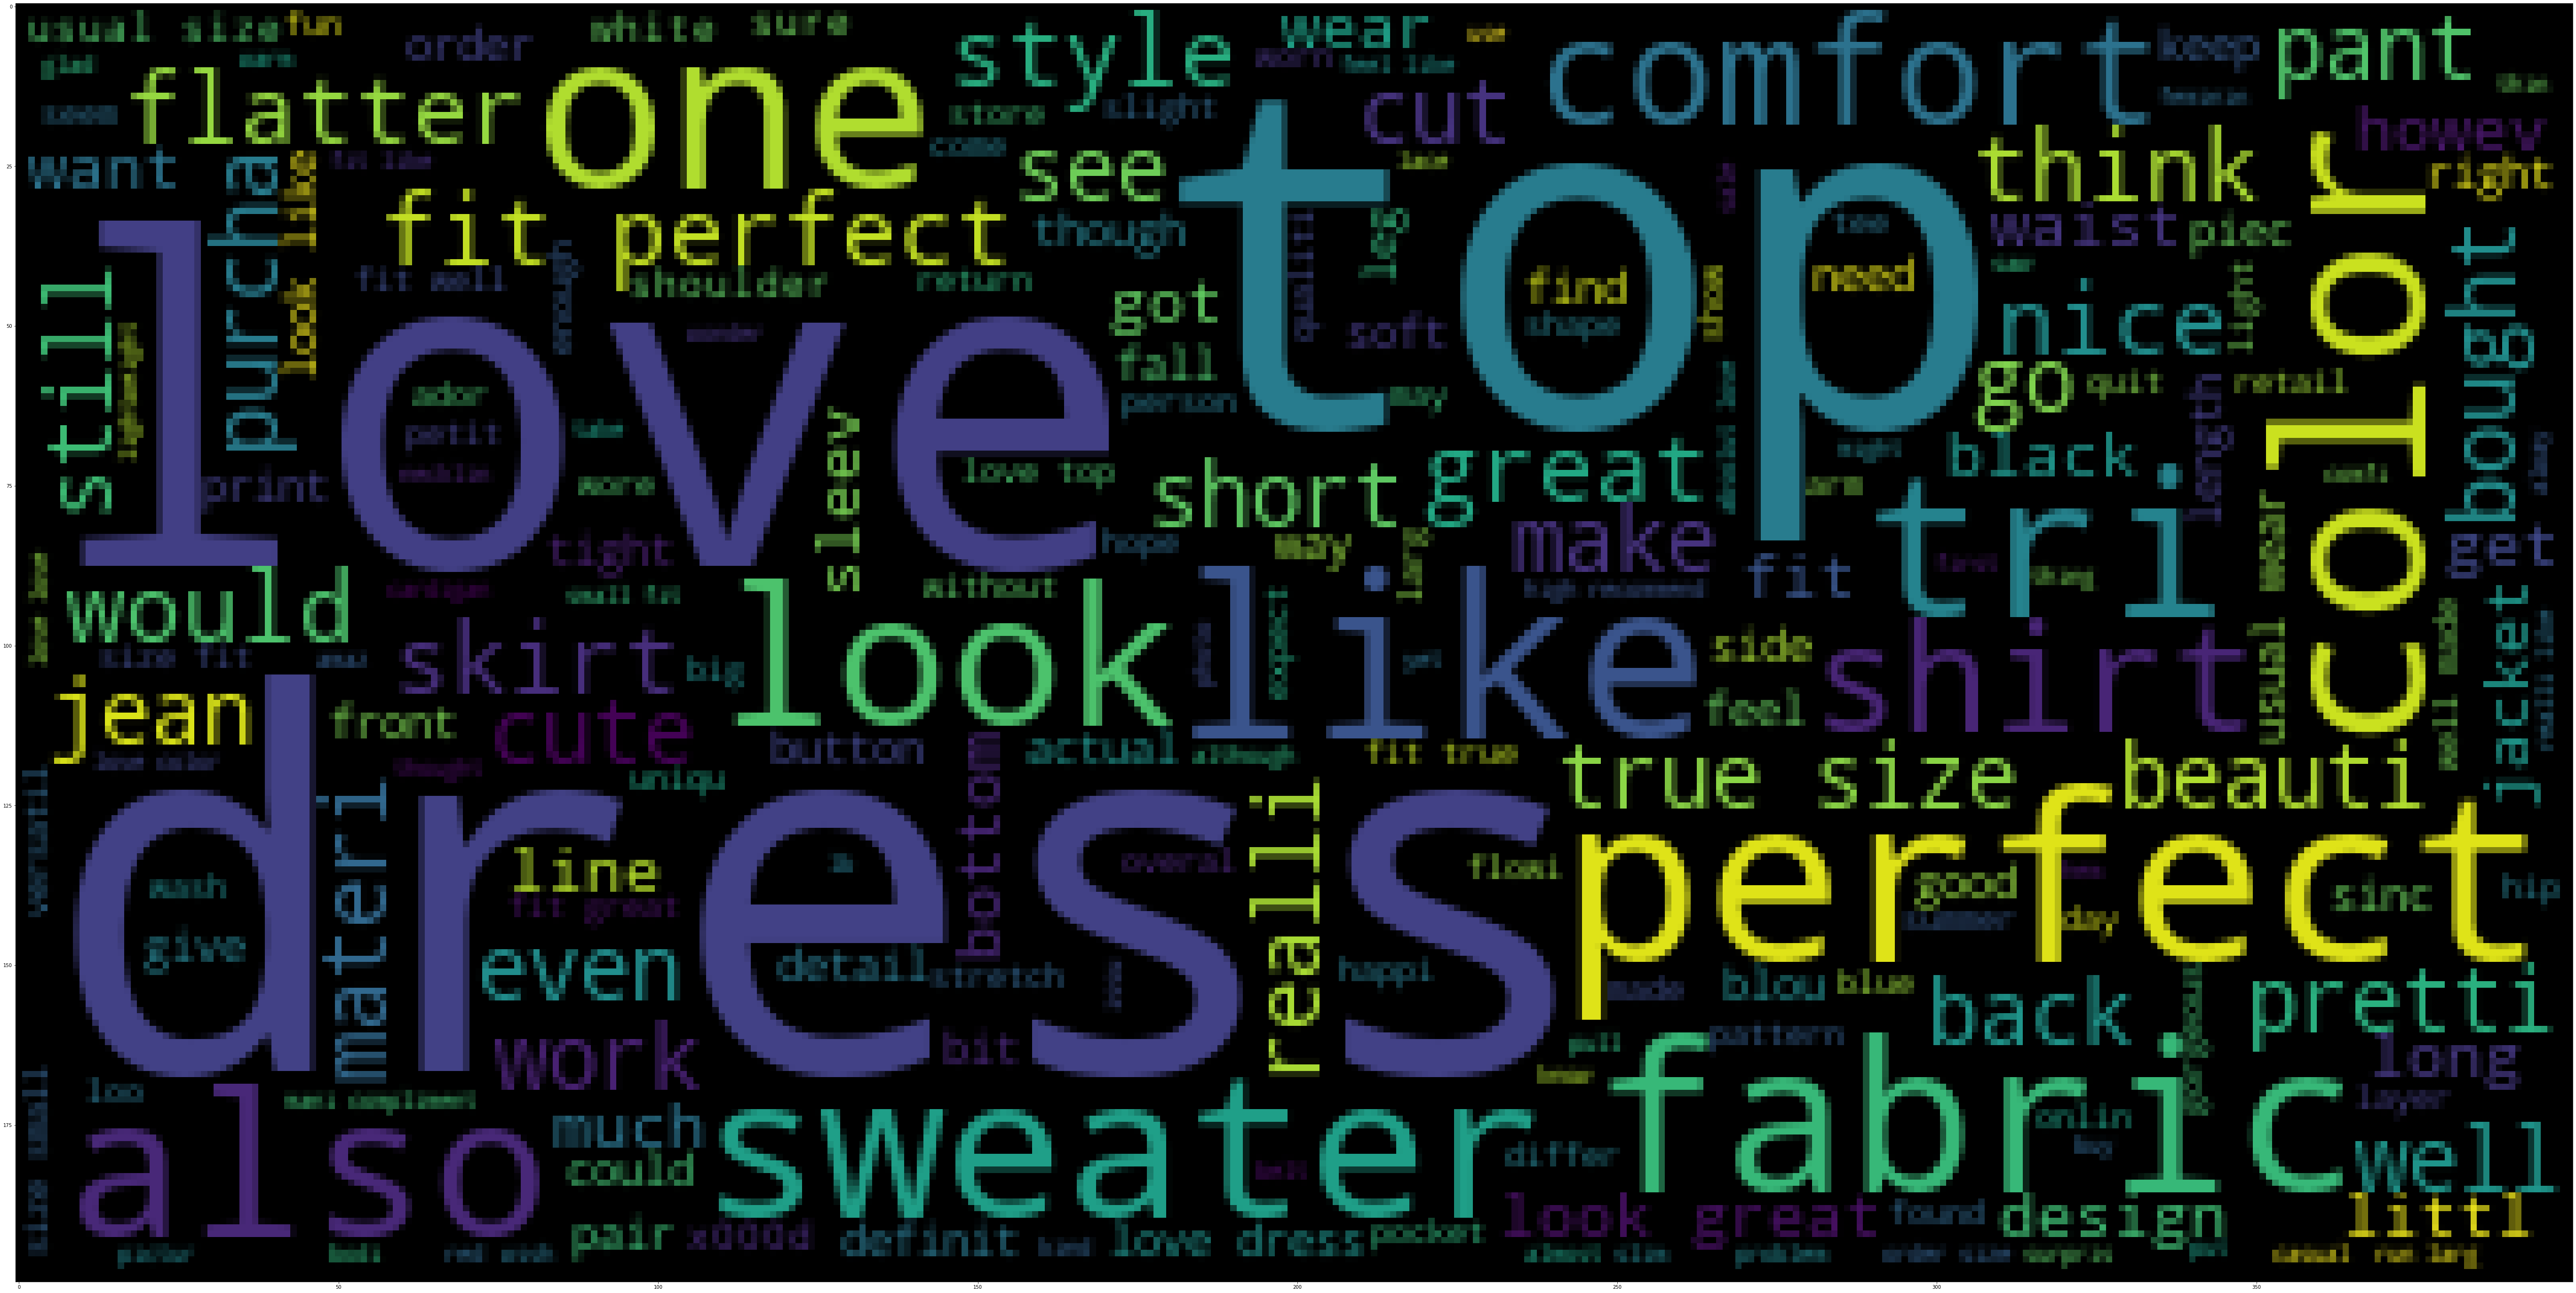

In [234]:
word_cloud = WordCloud(stopwords=stop).generate(' '.join(positive_review.tolist()))
fig = plt.figure(figsize=(200,50))
plt.imshow(word_cloud)

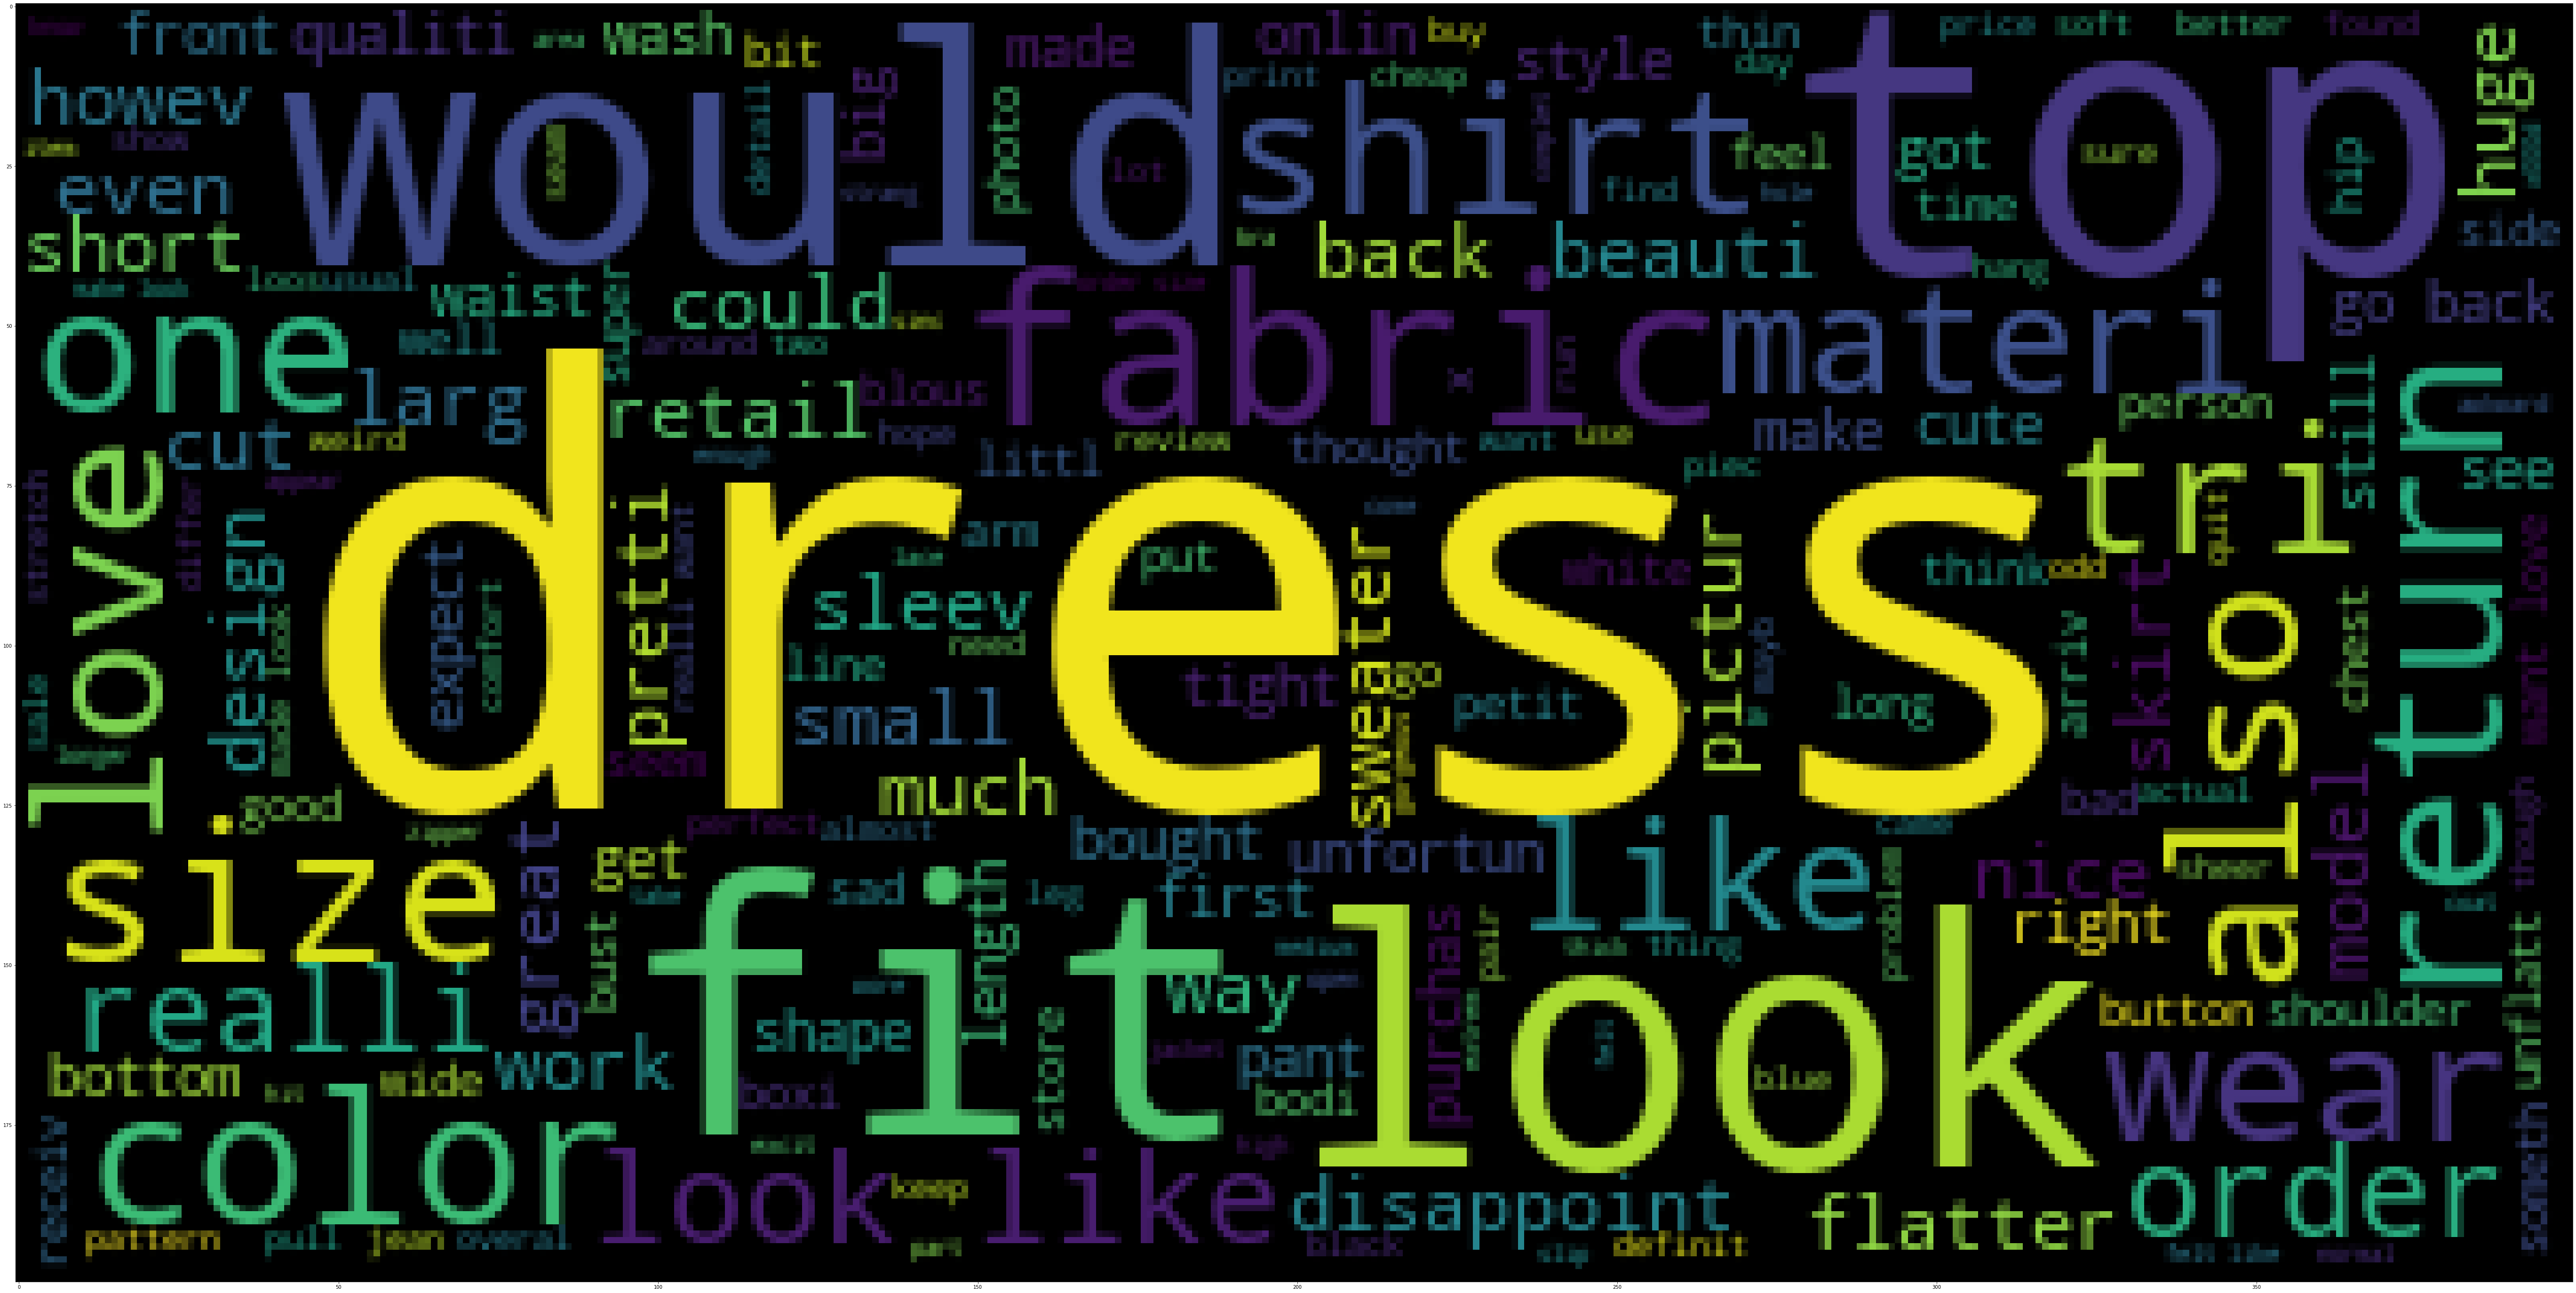

In [235]:
wordcloud = WordCloud(stopwords=stop).generate(' '.join(negative_review.tolist()))
fig = plt.figure(figsize=(200,50))
plt.imshow(wordcloud)

### Model Building

In [236]:
Y = data['Recommend_Flag']
X = data['Review_final']

In [237]:
X

2        i high hope dress realli want work initi order...
3        i love love love jumpsuit fun flirti fabul eve...
4        this shirt flatter due adjust front tie perfec...
5        i love traci rees dress one petit 5 feet tall ...
6        i ade basket hte last mintu see would look lik...
                               ...                        
23481    i happi snag dress great price easi slip flatt...
23482    it remind matern cloth soft stretchi shini mat...
23483    this fit well top see never would work glad ab...
23484    i bought dress wed summer cute unfortun fit pe...
23485    this dress love platinum feminin fit perfect e...
Name: Review_final, Length: 19662, dtype: object

### Split dataset into train and test

In [238]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=123)

In [239]:
print('shape of train_x :',train_x.shape)
print('shape of test_x :',test_x.shape)
print('shape of train_y :',train_y.shape)
print('shape of test_y :',test_y.shape)

shape of train_x : (13763,)
shape of test_x : (5899,)
shape of train_y : (13763,)
shape of test_y : (5899,)


### logistic Regression

In [240]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_x)
X_test_tfidf = tfidf_vect.transform(test_x)

In [241]:
dtm_tfidf_train=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
dtm_tfidf_test=pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [242]:
logit_model = LogisticRegression().fit(dtm_tfidf_train, train_y)

In [243]:
print(metrics.classification_report(train_y, logit_model.predict(dtm_tfidf_train)))
print(metrics.classification_report(test_y, logit_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      2502
           1       0.91      0.97      0.94     11261

    accuracy                           0.90     13763
   macro avg       0.87      0.77      0.80     13763
weighted avg       0.89      0.90      0.89     13763

              precision    recall  f1-score   support

           0       0.77      0.50      0.61      1073
           1       0.90      0.97      0.93      4826

    accuracy                           0.88      5899
   macro avg       0.83      0.73      0.77      5899
weighted avg       0.87      0.88      0.87      5899



In [244]:
lr_acc_train = metrics.accuracy_score(train_y,logit_model.predict(dtm_tfidf_train))
lr_acc_test = metrics.accuracy_score(test_y,logit_model.predict(dtm_tfidf_test))

### SVC

In [245]:
svc_model = LinearSVC(C=1.0).fit(dtm_tfidf_train,train_y)

In [246]:
print(metrics.classification_report(train_y,svc_model.predict(dtm_tfidf_train)))
print(metrics.classification_report(test_y,svc_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      2502
           1       0.93      0.97      0.95     11261

    accuracy                           0.91     13763
   macro avg       0.87      0.82      0.84     13763
weighted avg       0.91      0.91      0.91     13763

              precision    recall  f1-score   support

           0       0.72      0.57      0.63      1073
           1       0.91      0.95      0.93      4826

    accuracy                           0.88      5899
   macro avg       0.81      0.76      0.78      5899
weighted avg       0.87      0.88      0.88      5899



In [247]:
svc_acc_train = metrics.accuracy_score(train_y,svc_model.predict(dtm_tfidf_train))
svc_acc_test = metrics.accuracy_score(test_y,svc_model.predict(dtm_tfidf_test))

### Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
RF_model = RandomForestClassifier().fit(dtm_tfidf_train,train_y)

In [250]:
print(metrics.classification_report(train_y,RF_model.predict(dtm_tfidf_train)))
print(metrics.classification_report(test_y,RF_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2502
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     13763
   macro avg       1.00      1.00      1.00     13763
weighted avg       1.00      1.00      1.00     13763

              precision    recall  f1-score   support

           0       0.80      0.29      0.42      1073
           1       0.86      0.98      0.92      4826

    accuracy                           0.86      5899
   macro avg       0.83      0.63      0.67      5899
weighted avg       0.85      0.86      0.83      5899



In [104]:
rf_acc_train = metrics.accuracy_score(train_y,RF_model.predict(dtm_tfidf_train))
rf_acc_test = metrics.accuracy_score(test_y,RF_model.predict(dtm_tfidf_test))

### AdaBoost

In [251]:
from sklearn.ensemble import AdaBoostClassifier

In [252]:
ada_model = AdaBoostClassifier().fit(dtm_tfidf_train,train_y)

In [253]:
print(metrics.classification_report(train_y,ada_model.predict(dtm_tfidf_train)))
print(metrics.classification_report(test_y,ada_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       0.70      0.47      0.56      2502
           1       0.89      0.96      0.92     11261

    accuracy                           0.87     13763
   macro avg       0.80      0.71      0.74     13763
weighted avg       0.86      0.87      0.86     13763

              precision    recall  f1-score   support

           0       0.68      0.44      0.53      1073
           1       0.88      0.95      0.92      4826

    accuracy                           0.86      5899
   macro avg       0.78      0.70      0.73      5899
weighted avg       0.85      0.86      0.85      5899



In [254]:
ab_acc_train = metrics.accuracy_score(train_y,ada_model.predict(dtm_tfidf_train))
ab_acc_test = metrics.accuracy_score(test_y,ada_model.predict(dtm_tfidf_test))

### Decision Tree

In [255]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
DT_model = DecisionTreeClassifier().fit(dtm_tfidf_train,train_y)

In [257]:
print(metrics.classification_report(train_y,DT_model.predict(dtm_tfidf_train)))
print(metrics.classification_report(test_y,DT_model.predict(dtm_tfidf_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2502
           1       1.00      1.00      1.00     11261

    accuracy                           1.00     13763
   macro avg       1.00      1.00      1.00     13763
weighted avg       1.00      1.00      1.00     13763

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1073
           1       0.87      0.88      0.88      4826

    accuracy                           0.80      5899
   macro avg       0.66      0.65      0.66      5899
weighted avg       0.80      0.80      0.80      5899



In [258]:
dt_acc_train = metrics.accuracy_score(train_y,DT_model.predict(dtm_tfidf_train))
dt_acc_test = metrics.accuracy_score(test_y,DT_model.predict(dtm_tfidf_test))

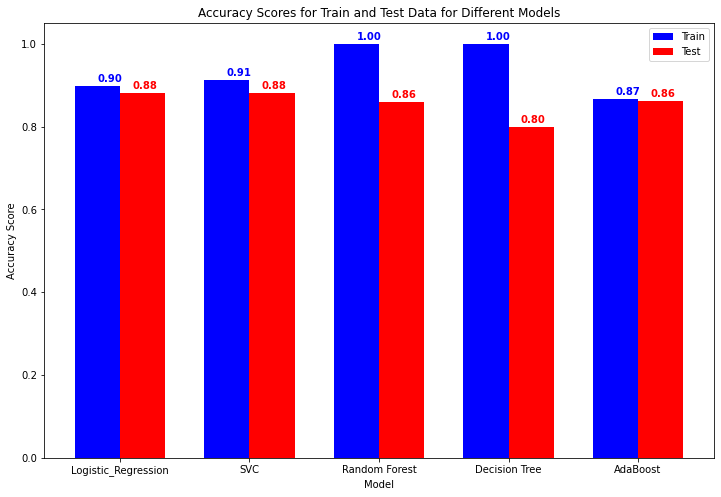

In [259]:
x_values = ['Logistic_Regression', 'SVC', 'Random Forest','Decision Tree','AdaBoost']
train_values = [lr_acc_train,svc_acc_train, rf_acc_train,dt_acc_train,ab_acc_train]
test_values = [lr_acc_test,svc_acc_test,rf_acc_test,dt_acc_test,ab_acc_test]

# Define the width of each bar
bar_width = 0.35
plt.figure(figsize=(12,8))

# Create a grouped bar graph using Matplotlib
r1 = np.arange(len(train_values))
r2 = [x + bar_width for x in r1]
ax1 =plt.bar(r1, train_values, color='b', width=bar_width, label='Train')
ax2 = plt.bar(r2, test_values, color='r', width=bar_width, label='Test')

# Add labels and a title to the graph
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Train and Test Data for Different Models')
plt.xticks([r + bar_width / 2 for r in range(len(train_values))], x_values)
plt.legend()

# Add value labels to the bars
for i, v in enumerate(train_values):
    plt.text(i + 0.0, v + 0.01, format(v, '.2f'), color='blue', fontweight='bold')
    
for i, v in enumerate(test_values):
    plt.text(i + 0.27, v + 0.01, format(v, '.2f'), color='red', fontweight='bold')
    
# Display the graph
plt.show()






In [260]:
x = data['Review_final'].values
y = data['Recommend_Flag'].values

In [261]:

num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x)
xtokens= tokenizer.texts_to_sequences(x)

In [262]:
#padding 


maxlen=1000
xpad=pad_sequences(xtokens,padding='post', maxlen=maxlen)

In [263]:
print(x)

['i high hope dress realli want work initi order petit small usual size found outrag small small fact could zip reorder petit medium ok overal top half comfort fit nice bottom half tight layer sever somewhat cheap net layer go major design flaw net layer sewn direct zipper c'
 'i love love love jumpsuit fun flirti fabul everi time wear get noth great compliment'
 'this shirt flatter due adjust front tie perfect length wear leg sleeveless pair well cardigan love shirt'
 ...
 'this fit well top see never would work glad abl tri store order onlin differ fabric would great'
 'i bought dress wed summer cute unfortun fit perfect medium fit waist perfect way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliv nordstrom tag found much cheaper look'
 'this dress love platinum feminin fit perfect easi wear comfi high recommend']


In [301]:
review_1 = "Amazing dress I purchased from this store! It fits perfectly and the fabric is so comfortable."
review_2 = "Absolutely worst. Fitting and quality is pathetic"
review_3 = "These jeans are amazing! They hug all the right places and are so flattering. I've already received so many compliments on them!"
review_4 = "I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
review_5 = 'The customer service at this store is fantastic. The staff is friendly and helpful, and they really go above and beyond to make sure you find exactly what youre looking for.'
review_6 = 'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.'
review_7 = 'Ive never had a top that was so comfortable right out of the box. These are definitely worth the investment.'
review_8 = 'Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.'
review_9 =  "if you are at least average height or taller, this may look good on you."
review_10 = "sadly will be returning,worst fabric, but i'm sure i will find something to exchange it for!"
review_11 = "Cute little dress fits tts. it is a little high waisted. good length for my 5'9 height. i like the dress, i'm just not in love with it. i dont think it looks or feels cheap. it appears just as pictured."
review_12 = 'Loved the material, but i didnt really look at how long the dress was before i purchased both a large and a medium. im 5\'5" and there was atleast 5" of material at my feet. the gaps in the front are much wider than they look. felt like the dress just fell flat. both were returned. im usually a large and the med fit better. 36d 30 in jeans'
review_13 = "I have been waiting for this sweater coat to ship for weeks and i was so excited for it to arrive. this coat has bad fitting and made me look short and squat."
review_14 = 'The material of this sweater is really itchy and uncomfortable. I cant wear it for more than a few minutes at a time, I return the product. '
review_15 = 'the fabric of this skirt is so thin and flimsy. It wrinkles easily and doesnt hold its shape well.'
review_16 = 'I was really like the overall quality of this pants.'
review_17 = 'The design of this t-shirt is really cool, but the fabric is so scratchy and uncomfortable.'
review_18 = 'worst quality.'
review_19 = 'I love with the overall quality of this jacket. the buttons were loose,.'
review_20 = 'I love the attention to detail on this dress. The buttons and ruffles are so cute, and the overall fit is so flattering.'
reviews = [review_1, review_2, review_3, review_4, review_5, review_6, review_7, review_8, review_9, review_10,
           review_11, review_12, review_13, review_14,review_15,review_16,review_17,review_18,review_19,review_20]

In [302]:
tokens = tokenizer.texts_to_sequences(reviews) 
tokens_pad = pad_sequences(tokens, maxlen=maxlen)
tokens_pad.shape

(20, 1000)

In [303]:
mod_pred_LR = logit_model.predict(tokens_pad)
mod_pred_LR

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [304]:
data_pred = pd.DataFrame(mod_pred_LR, index=reviews)
data_pred.rename(columns={0: 'Pred_Proba'}, inplace=True)

In [305]:
data_pred["Predict-Review"] = data_pred["Pred_Proba"].apply(lambda x: 'Positive' if x>=0.3 else 'Negative')
data_pred

,Pred_Proba,Predict-Review
Amazing dress I purchased from this store! It fits perfectly and the fabric is so comfortable.,1,Positive
Absolutely worst. Fitting and quality is pathetic,0,Negative
These jeans are amazing! They hug all the right places and are so flattering. I've already received so many compliments on them!,1,Positive
"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1,Positive
"The customer service at this store is fantastic. The staff is friendly and helpful, and they really go above and beyond to make sure you find exactly what youre looking for.",0,Negative
"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress.",1,Positive
Ive never had a top that was so comfortable right out of the box. These are definitely worth the investment.,1,Positive
Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back.,1,Positive
"if you are at least average height or taller, this may look good on you.",1,Positive
"sadly will be returning,worst fabric, but i'm sure i will find something to exchange it for!",1,Positive
